In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Airline_Delay_Cause.csv")

In [3]:
data.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,4,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",86.0,9.0,3.12,0.00,...,0.0,3.73,0.0,0.0,486.0,231.0,0.0,64.0,0.0,191.0
1,2024,4,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,9.0,2.53,0.00,...,0.0,2.70,0.0,1.0,603.0,185.0,0.0,173.0,0.0,245.0
2,2024,4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",156.0,16.0,10.57,0.00,...,0.0,3.23,0.0,0.0,703.0,465.0,0.0,123.0,0.0,115.0
3,2024,4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",115.0,16.0,8.00,0.98,...,0.0,4.31,0.0,0.0,865.0,517.0,41.0,88.0,0.0,219.0
4,2024,4,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2032.0,241.0,60.87,12.49,...,0.0,110.66,3.0,1.0,16233.0,5737.0,1528.0,1745.0,0.0,7223.0


In [4]:



data_cleaned = data.dropna()


missing_values_after = data_cleaned.isnull().sum()


print("Shape of data after removing rows with missing values:", data_cleaned.shape)



Shape of data after removing rows with missing values: (1854, 21)


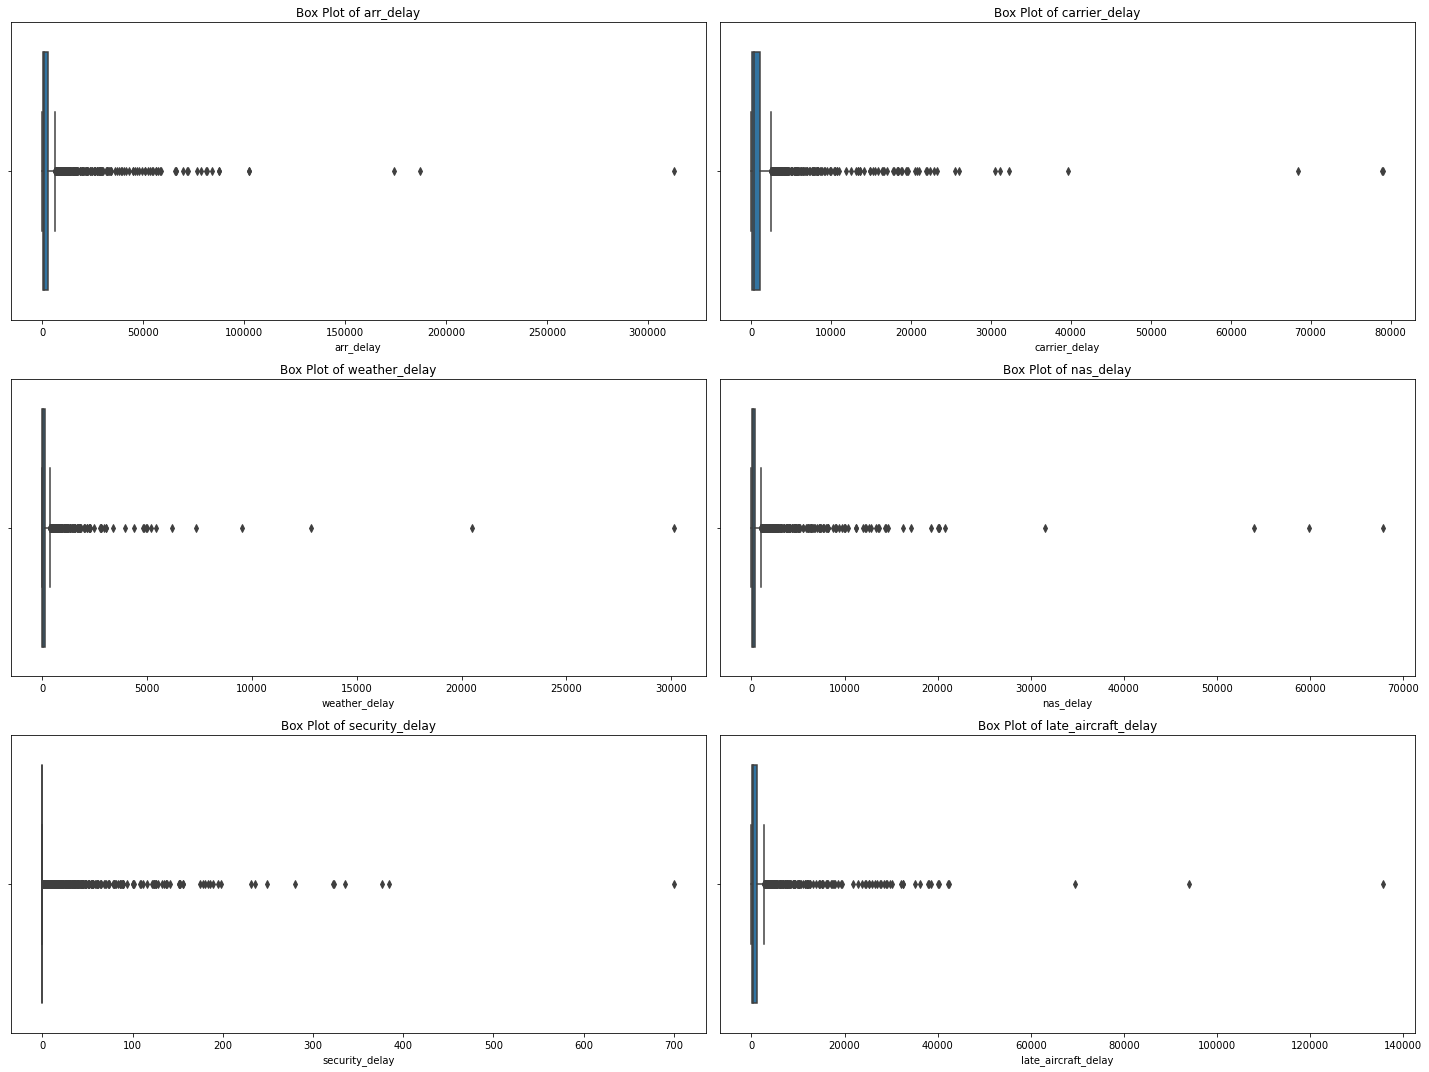


Summary Statistics:
           arr_delay  carrier_delay  weather_delay     nas_delay  \
count    1854.000000    1854.000000    1854.000000   1854.000000   
mean     4313.517799    1440.950917     225.199569    858.268608   
std     13611.046961    4429.637202    1054.859713   3241.601892   
min         0.000000       0.000000       0.000000      0.000000   
25%       346.250000      97.000000       0.000000     43.000000   
50%       946.000000     319.500000      20.000000    136.000000   
75%      2701.500000    1043.500000     145.000000    437.500000   
max    312907.000000   79064.000000   30134.000000  67816.000000   

       security_delay  late_aircraft_delay  
count     1854.000000          1854.000000  
mean         8.480043          1780.618662  
std         35.168416          6071.490397  
min          0.000000             0.000000  
25%          0.000000            68.000000  
50%          0.000000           305.500000  
75%          0.000000          1144.000000  
max   

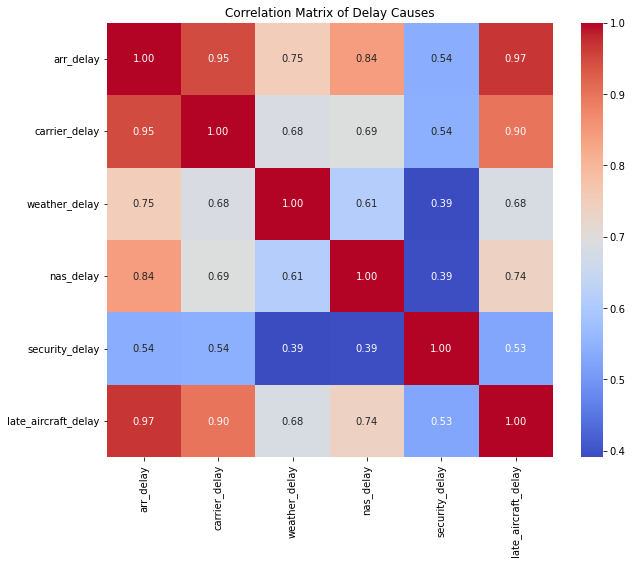

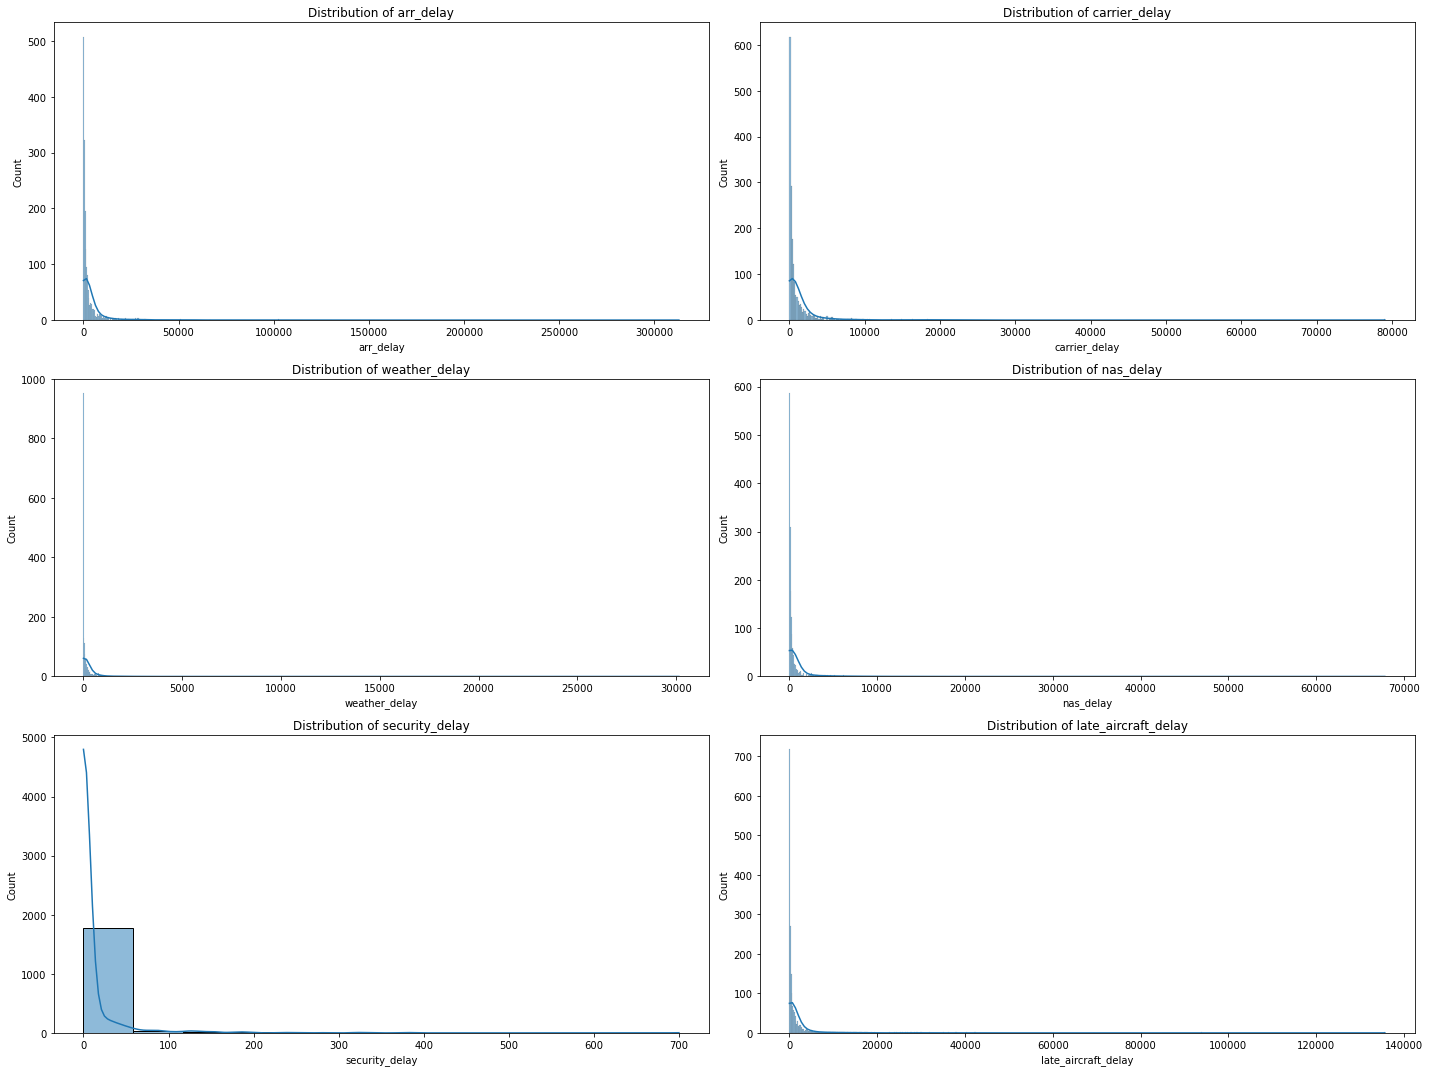

In [5]:



plt.figure(figsize=(20, 15))


delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 
                 'nas_delay', 'security_delay', 'late_aircraft_delay']

for i, col in enumerate(delay_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Box Plot of {col}')
    
plt.tight_layout()
plt.show()


print("\nSummary Statistics:")
print(data_cleaned[delay_columns].describe())

correlation_matrix = data_cleaned[delay_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Delay Causes')
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(delay_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


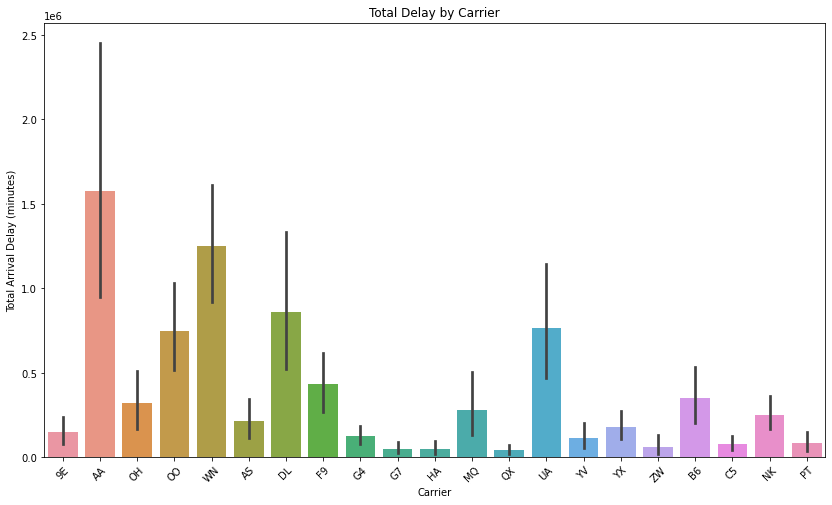

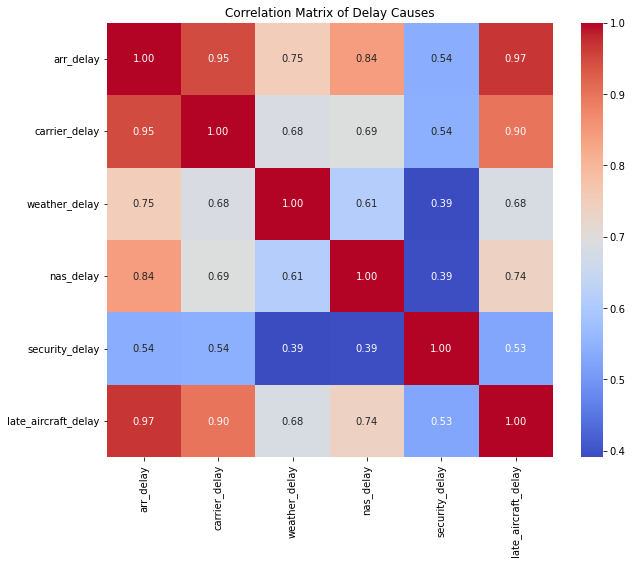

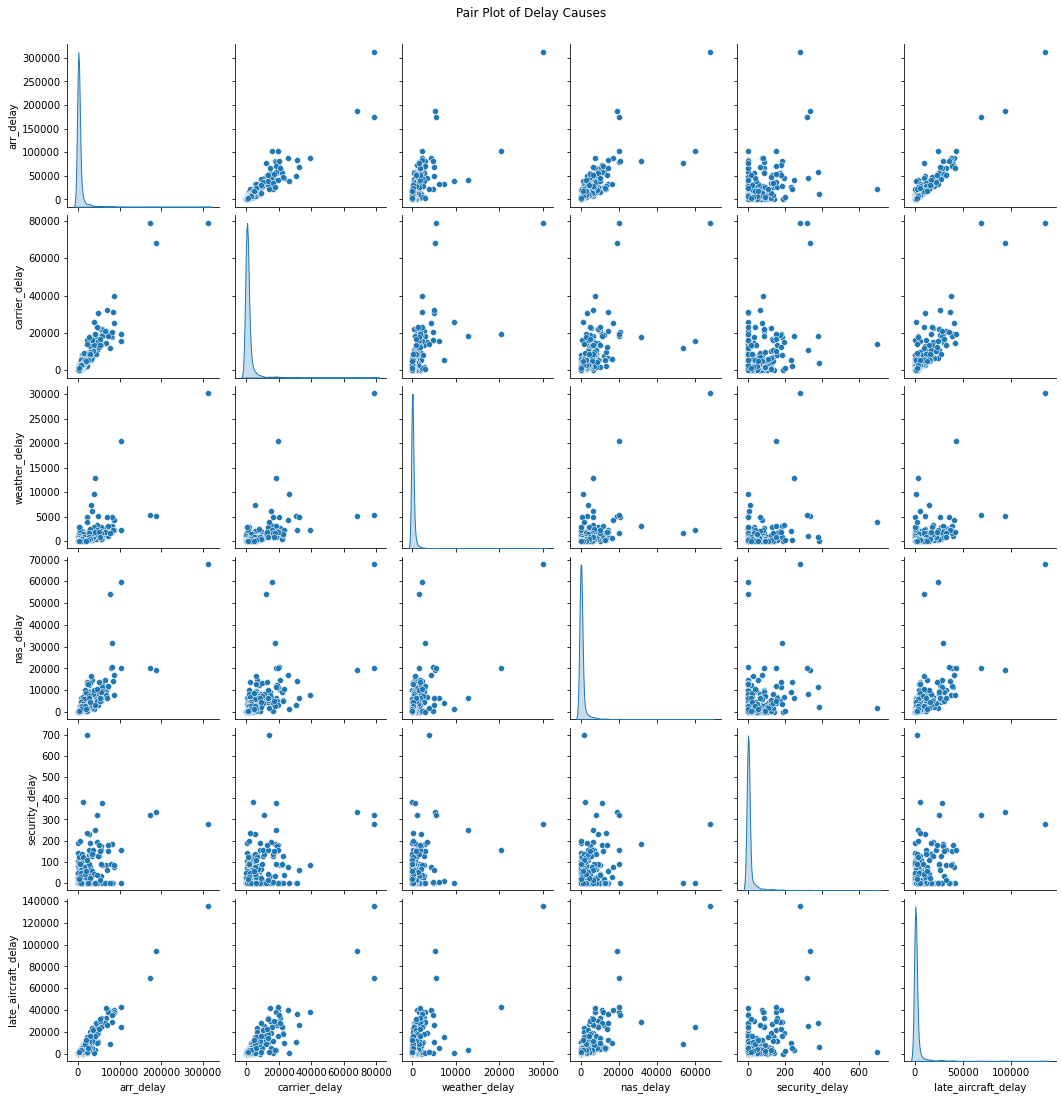

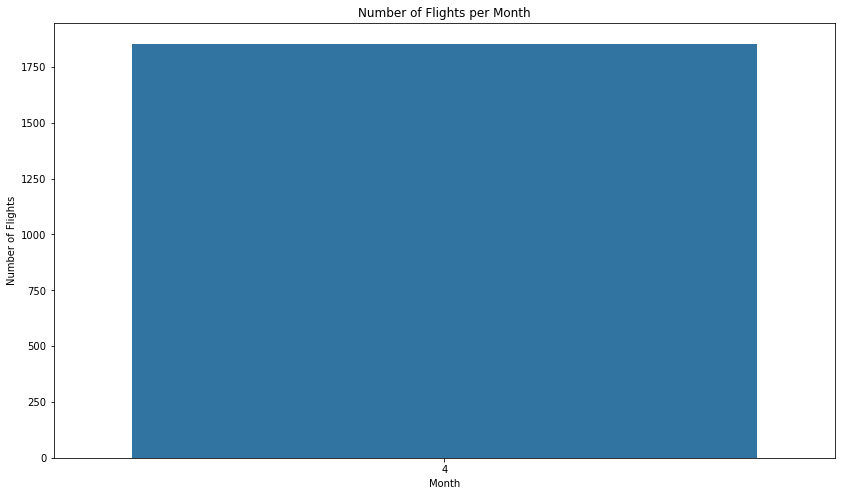

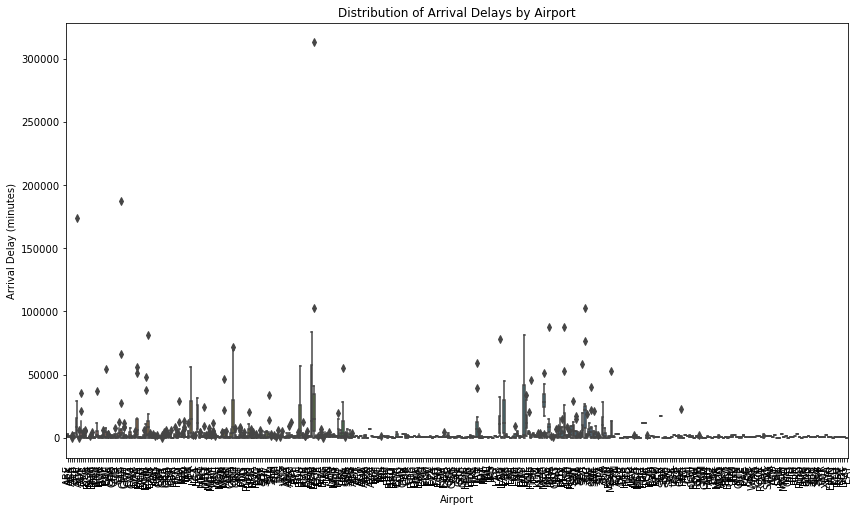

In [6]:

data_cleaned = data.dropna()


plt.figure(figsize=(14, 8))
sns.barplot(x='carrier', y='arr_delay', data=data_cleaned, estimator=sum)
plt.title('Total Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Total Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 8))
delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 
                 'nas_delay', 'security_delay', 'late_aircraft_delay']

correlation_matrix = data_cleaned[delay_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Delay Causes')
plt.show()


sns.pairplot(data_cleaned[delay_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Delay Causes', y=1.02)
plt.show()


plt.figure(figsize=(14, 8))
sns.countplot(x='month', data=data_cleaned)
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

# Additional: Box Plot - Distribution of Arrival Delays by Airport
plt.figure(figsize=(14, 8))
sns.boxplot(x='airport', y='arr_delay', data=data_cleaned)
plt.title('Distribution of Arrival Delays by Airport')
plt.xlabel('Airport')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.show()


Linear Regression RMSE: 335.89433097677966
Linear Regression R^2: 0.9989486293127814
Random Forest RMSE: 1589.9027405181985
Random Forest R^2: 0.9764445377027523


C:\Users\nikhi\AppData\Local\Temp/ipykernel_11392/3797335581.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = clusters


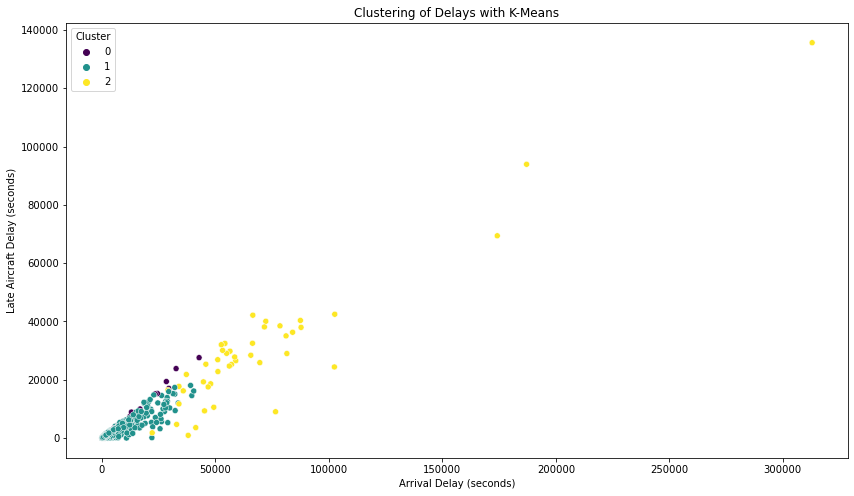

Cluster Centers:
[[ 0.00000000e+00  0.00000000e+00 -1.50712003e-01 ... -2.32306997e-02
  -2.32306997e-02 -3.28620390e-02]
 [ 0.00000000e+00  0.00000000e+00 -1.18534033e-01 ...  1.82440050e-03
   1.82440050e-03  2.58078840e-03]
 [ 0.00000000e+00  0.00000000e+00  4.82942408e+00 ... -2.32306997e-02
  -2.32306997e-02 -3.28620390e-02]]


In [24]:


# Step 1: Prepare the Data
# Define features and target variable for prediction
X = data_cleaned.drop(['arr_delay', 'carrier_name', 'airport_name'], axis=1)  # Drop target and irrelevant columns
y = data_cleaned['arr_delay']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['carrier', 'airport'], drop_first=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Prediction Models

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lin, squared=False))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lin))

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


data_cleaned['Cluster'] = clusters


plt.figure(figsize=(14, 8))
sns.scatterplot(x='arr_delay', y='late_aircraft_delay', hue='Cluster', data=data_cleaned, palette='viridis')
plt.title('Clustering of Delays with K-Means')
plt.xlabel('Arrival Delay (seconds)')
plt.ylabel('Late Aircraft Delay (seconds)')
plt.show()


print("Cluster Centers:")
print(kmeans.cluster_centers_)


In [11]:
data['Total Delay'] = data[delay_columns].fillna(0).sum(axis=1)


In [13]:
airport_grouped_df = data.groupby('airport_name')['Total Delay'].sum().reset_index()
airport_grouped_df.sort_values(by='Total Delay',ascending=False).head(10)

,airport_name,Total Delay
80,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",1134346.0
62,"Chicago, IL: Chicago O'Hare International",639350.0
57,"Charlotte, NC: Charlotte Douglas International",632670.0
85,"Denver, CO: Denver International",627312.0
284,"San Francisco, CA: San Francisco International",615380.0
18,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",592126.0
237,"Orlando, FL: Orlando International",460348.0
248,"Phoenix, AZ: Phoenix Sky Harbor International",441074.0
192,"Los Angeles, CA: Los Angeles International",404078.0
181,"Las Vegas, NV: Harry Reid International",395682.0


In [14]:
carrier_grouped_df = data.groupby('carrier_name')['Total Delay'].sum().reset_index()


In [15]:
carrier_grouped_df.sort_values(by='Total Delay',ascending=False).head(10)

,carrier_name,Total Delay
3,American Airlines Network,3156370.0
18,Southwest Airlines,2497050.0
5,Delta Air Lines Network,1717510.0
20,United Air Lines Network,1537572.0
17,SkyWest Airlines Inc.,1495718.0
8,Frontier Airlines,872590.0
12,JetBlue Airways,703142.0
14,PSA Airlines Inc.,642608.0
7,Envoy Air,556872.0
19,Spirit Airlines,507506.0


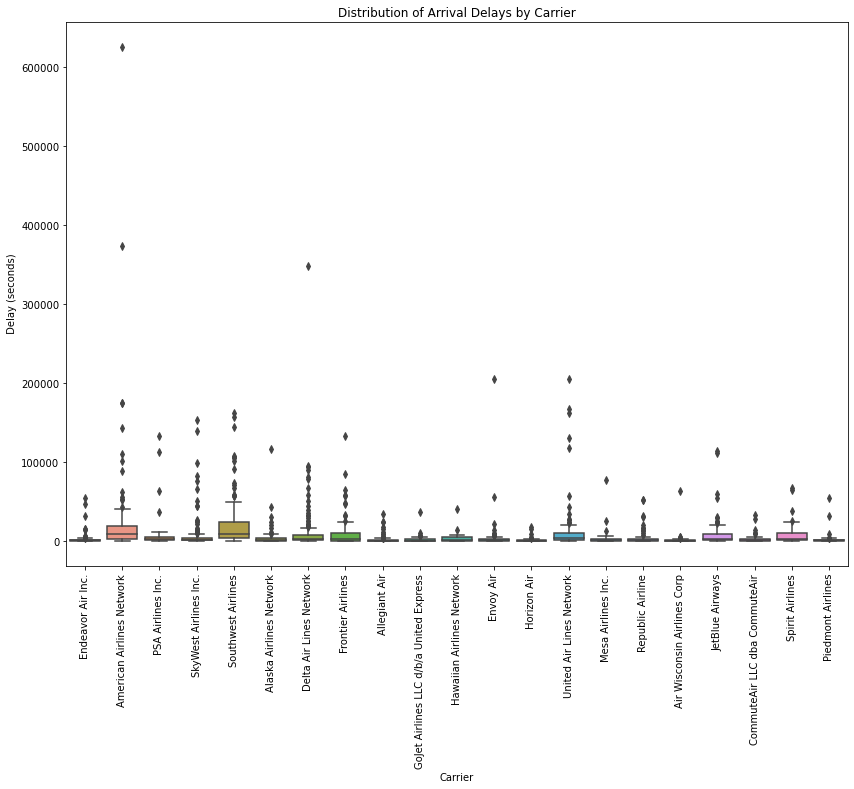

In [16]:
plt.figure(figsize=(14,10))
sns.boxplot(x='carrier_name', y='Total Delay', data=data)
plt.title('Distribution of Arrival Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel(' Delay (seconds)')
plt.xticks(rotation=90)
plt.show()

In [18]:
datanew= data.dropna()

In [20]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 0 to 1855
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1854 non-null   int64  
 1   month                1854 non-null   int64  
 2   carrier              1854 non-null   object 
 3   carrier_name         1854 non-null   object 
 4   airport              1854 non-null   object 
 5   airport_name         1854 non-null   object 
 6   arr_flights          1854 non-null   float64
 7   arr_del15            1854 non-null   float64
 8   carrier_ct           1854 non-null   float64
 9   weather_ct           1854 non-null   float64
 10  nas_ct               1854 non-null   float64
 11  security_ct          1854 non-null   float64
 12  late_aircraft_ct     1854 non-null   float64
 13  arr_cancelled        1854 non-null   float64
 14  arr_diverted         1854 non-null   float64
 15  arr_delay            1854 non-null   f

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = datanew.drop(['Total Delay', 'carrier_name', 'airport_name'], axis=1)  
y = datanew['Total Delay']

X = pd.get_dummies(X, columns=['carrier', 'airport'], drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred = lin_reg.predict(X_test)
linregr2 = r2_score(y_test, y_pred)

print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Linear Regression R^2:", r2_score(y_test, y_pred))


Linear Regression RMSE: 877.6481592737489
Linear Regression R^2: 0.9982055497698795


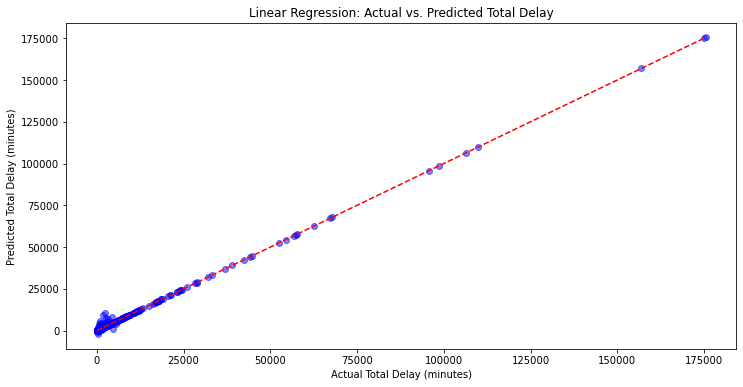

In [29]:
# Scatter plot of actual vs. predicted total delay
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted Total Delay')
plt.xlabel('Actual Total Delay (minutes)')
plt.ylabel('Predicted Total Delay (minutes)')
plt.show()


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)


print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 1389.886456406963
Random Forest R^2: 0.9954996201563532


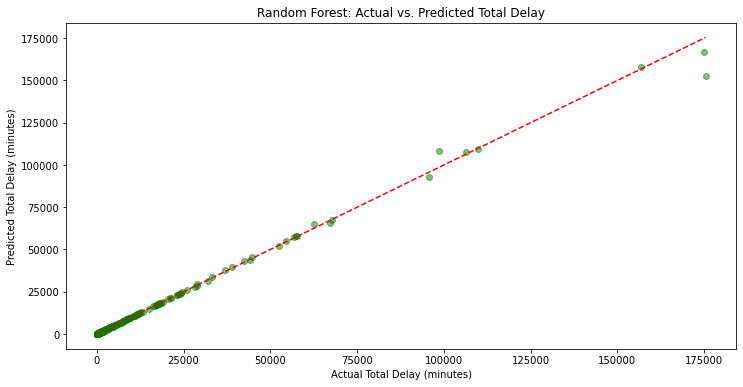

In [31]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted total delay for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted Total Delay')
plt.xlabel('Actual Total Delay (minutes)')
plt.ylabel('Predicted Total Delay (minutes)')
plt.show()


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_reg.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("Decision Tree R^2:", r2_score(y_test, y_pred_dt))


Decision Tree RMSE: 1085.7511193922185
Decision Tree R^2: 0.9972536802732124


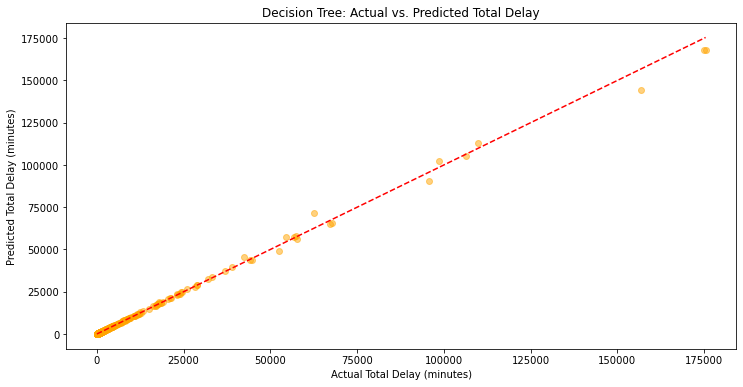

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted Total Delay')
plt.xlabel('Actual Total Delay (minutes)')
plt.ylabel('Predicted Total Delay (minutes)')
plt.show()


In [34]:
# Assuming you've already calculated these in the previous steps
r2_lin_reg = r2_score(y_test, y_pred_lin)
r2_rf_reg = r2_score(y_test, y_pred_rf)
r2_dt_reg = r2_score(y_test, y_pred_dt)


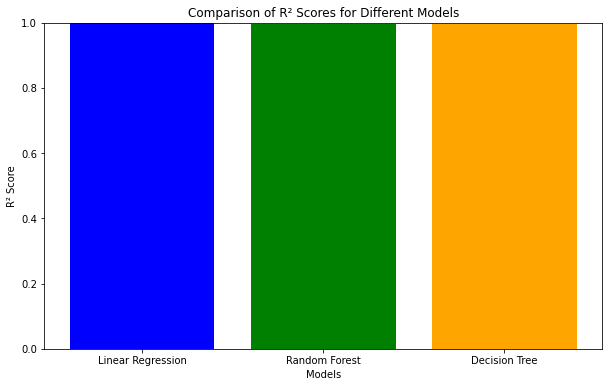

In [37]:



models = ['Linear Regression', 'Random Forest', 'Decision Tree']
r2_scores = [linregr2, r2_rf_reg, r2_dt_reg]


plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])


plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)  
plt.show()
